# Análise Exploratória de Dados em Linguagem Python Para Análise de Dados e Data Science - PERGUNTAS DE NEGÓCIOS:

In [1]:
# imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# carregando os dados:
df_dsa = pd.read_csv('dados/dataset.csv')

# shape:
df_dsa.shape

(9700, 11)

In [2]:
# Análise exploratória:

# colunas do conjunto de dados
print(df_dsa.columns, '\n')

# verificando o tipo de dado de cada coluna
print(df_dsa.dtypes, '\n')

# resumo estatístico da coluna com o valor da venda
print(df_dsa['Valor_Venda'].describe(), '\n')

# verificando se há registros duplicados
print(df_dsa[df_dsa.duplicated()], '\n')

# verificando se há valores ausentes
print(df_dsa.isnull().sum(), '\n')

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object') 

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object 

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64 

Empty DataFrame
Columns: [ID_Pedido, Data_Pedido, ID_Cliente, Segmento, Pais, Cidade, Estado, ID_Produto, Categoria, SubCategoria, Valor_Venda]
Index: [] 

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategori

In [3]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


1. Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [4]:
# filtrando o dataframe com os registros da categoria desejada para análise
df_dsa_f1 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

# agrupando por cidade
df_dsa_pc = df_dsa_f1.groupby('Cidade')['Valor_Venda'].sum()

# a cidade com o maior número de vendas para essa categoria
cidadeMV = df_dsa_pc.idxmax()
print('A cidade com o maior valor de vendas na categoria Office Supplies foi:', cidadeMV)

A cidade com o maior valor de vendas na categoria Office Supplies foi: New York City


2. Qual o Total de Vendas Por Data do Pedido?
Demonstre o resultado através de um gráfico de barras.

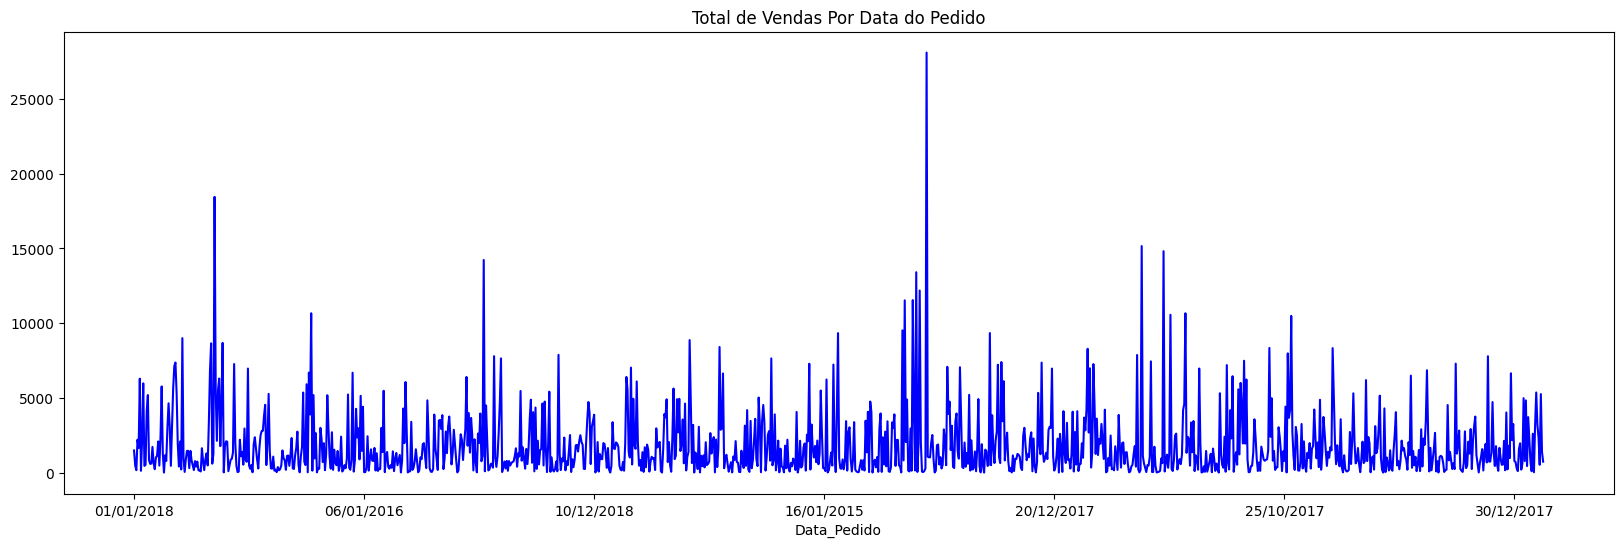

In [5]:
# total de vendas para cada data
df_dsa_f2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

df_dsa_f2.head()

# plot
plt.figure(figsize = (20, 6))
df_dsa_f2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'blue')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

3. Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.

       Estado  Valor_Venda
0     Alabama   19510.6400
1     Arizona   35272.6570
2    Arkansas   11673.8300
3  California  442927.0975
4    Colorado   31841.5980


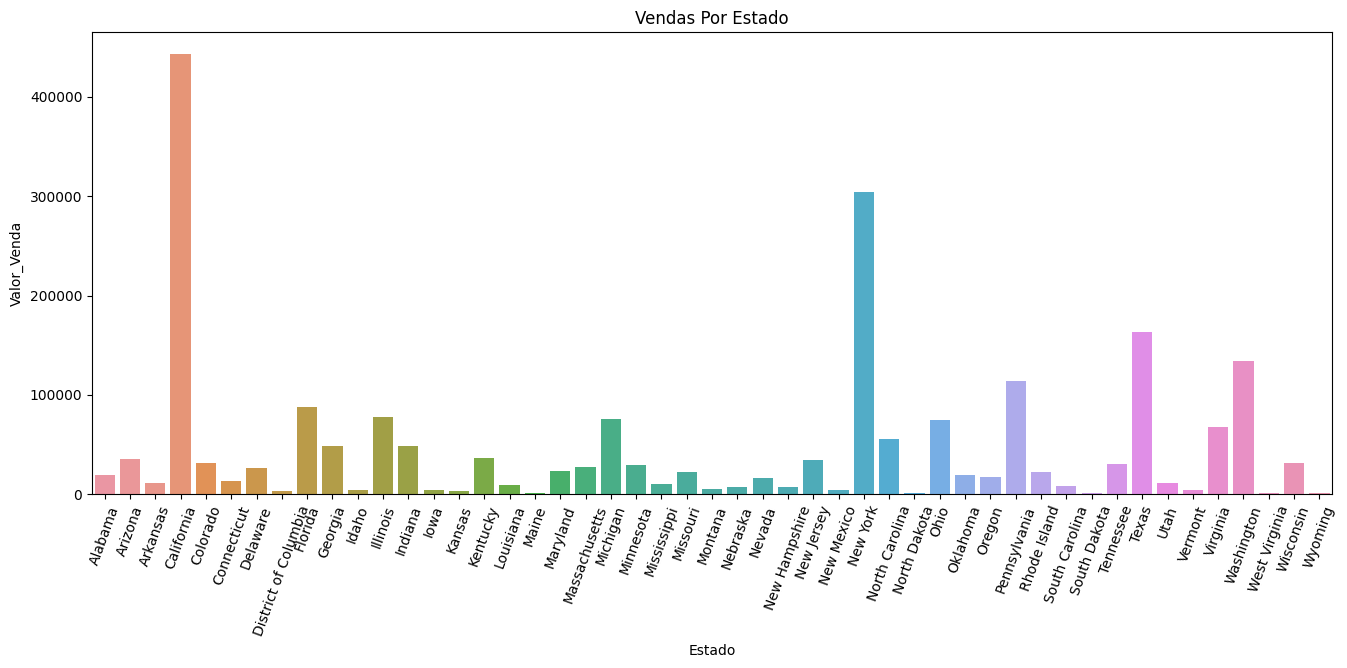

In [6]:
# total de vendas para cada estado
df_dsa_f3 = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

print(df_dsa_f3.head())

# plot
plt.figure(figsize = (16, 6))
sns.barplot(data = df_dsa_f3,
           y = 'Valor_Venda',
           x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 70)
plt.show()

4. Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

            Cidade  Valor_Venda
327  New York City  251749.2190
265    Los Angeles  171654.6330
450        Seattle  114725.4780
436  San Francisco  107489.9520
372   Philadelphia  107197.8030
207        Houston   61590.1868
435      San Diego   47458.3790
80         Chicago   46974.3430
216   Jacksonville   44713.1830
123        Detroit   42446.9440


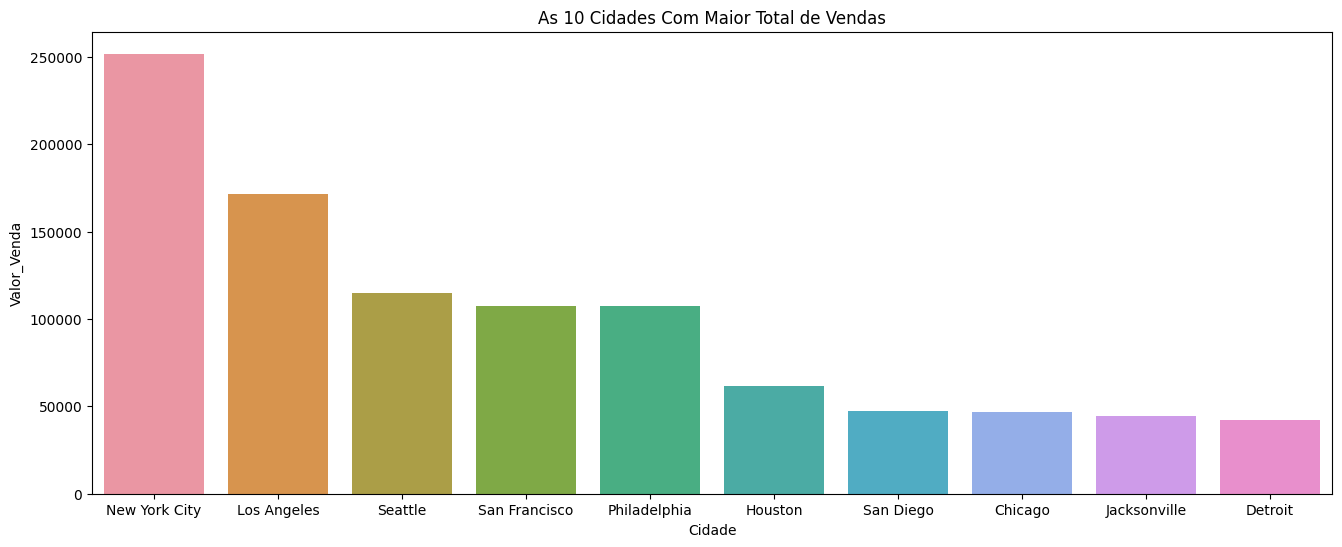

In [7]:
# Agrupamento por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros
df_dsa_f4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                   ascending = False).head(10)
print(df_dsa_f4.head(10))

# plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm') # peleta de cores
sns.barplot(data = df_dsa_f4,
           y = 'Valor_Venda',
           x = 'Cidade').set(title = 'As 10 Cidades Com Maior Total de Vendas')
plt.show()

5. Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.

      Segmento   Valor_Venda
0     Consumer  1.133834e+06
1    Corporate  6.792322e+05
2  Home Office  4.224914e+05


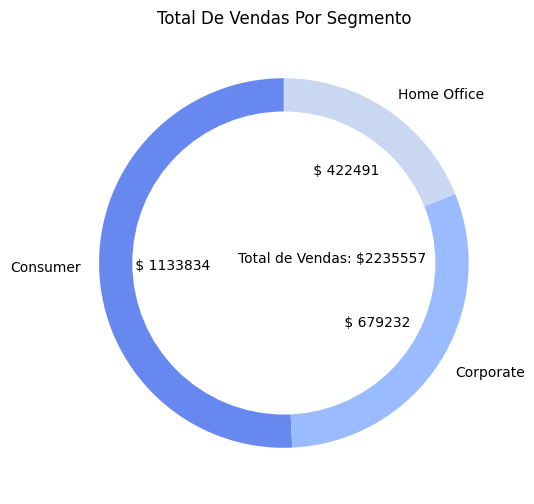

In [8]:
# agrupo por seguimento
df_dsa_f5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                     ascending = False)
print(df_dsa_f5.head())

# convertendo os dados em valor absoluto, pois o pandas converte para Notação Científica, pois trata-se de grandes valores
def autopct_format (values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d} '.format(v = val)
    return my_format

# plot 
plt.figure(figsize = (16, 6))
plt.pie(df_dsa_f5['Valor_Venda'],
       labels = df_dsa_f5['Segmento'],
       autopct = autopct_format(df_dsa_f5['Valor_Venda']),
       startangle = 90)

# limpa o círculo central:
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# labels 
plt.annotate(text = 'Total de Vendas: ' + '$' + str(int(sum(df_dsa_f5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total De Vendas Por Segmento')
plt.show()


7. Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:Se o Valor_Venda for maior que 1000 recebe 15% de desconto.  Se o Valor_Venda for menor que 1000 recebe 10% de desconto. Quantas Vendas Receberiam 15% de Desconto?

In [9]:
# cria uma nova coluna de acordo com a regra definida acima
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)

print(df_dsa.head(), '\n')

# total por cada valor da variável:
print(df_dsa['Desconto'].value_counts(), '\n') # conta o total de registros para cada categoria

print('No Ttotal 457 Vendas Receberiam Desconto de 15%.')

        ID_Pedido Data_Pedido ID_Cliente   Segmento           Pais  \
0  CA-2017-152156  08/11/2017   CG-12520   Consumer  United States   
1  CA-2017-152156  08/11/2017   CG-12520   Consumer  United States   
2  CA-2017-138688  12/06/2017   DV-13045  Corporate  United States   
3  US-2016-108966  11/10/2016   SO-20335   Consumer  United States   
4  US-2016-108966  11/10/2016   SO-20335   Consumer  United States   

            Cidade      Estado       ID_Produto        Categoria SubCategoria  \
0        Henderson    Kentucky  FUR-BO-10001798        Furniture    Bookcases   
1        Henderson    Kentucky  FUR-CH-10000454        Furniture       Chairs   
2      Los Angeles  California  OFF-LA-10000240  Office Supplies       Labels   
3  Fort Lauderdale     Florida  FUR-TA-10000577        Furniture       Tables   
4  Fort Lauderdale     Florida  OFF-ST-10000760  Office Supplies      Storage   

   Valor_Venda  Desconto  
0     261.9600       0.1  
1     731.9400       0.1  
2      14.6

8. Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual
Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [10]:
# coluna que calcula o valor de vanda - desconto
df_dsa['Valor_Venda_Desconto'] = df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda'] * df_dsa['Desconto'])
print(df_dsa.head(), '\n')

# filtrando as vendas antes do desconto de 15%
df_dsa_p8_vendas_antes_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']

# filtrando as vendas depois do desconto 15%
df_dsa_p8_vendas_depois_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda_Desconto']

# cálculo da média das vendas antes do desconto
media_vendas_antes_desconto = df_dsa_p8_vendas_antes_desconto.mean()

# cálculo da média das vendas depois do desconto
media_vendas_depois_desconto = df_dsa_p8_vendas_depois_desconto.mean()

# Imprimo resultados
print('****************************************************')
print('Média das vendas antes do desconto de 15%:', round(media_vendas_antes_desconto, 2))
print('Média das vendas depois do desconto de 15%:', round(media_vendas_depois_desconto, 2))

        ID_Pedido Data_Pedido ID_Cliente   Segmento           Pais  \
0  CA-2017-152156  08/11/2017   CG-12520   Consumer  United States   
1  CA-2017-152156  08/11/2017   CG-12520   Consumer  United States   
2  CA-2017-138688  12/06/2017   DV-13045  Corporate  United States   
3  US-2016-108966  11/10/2016   SO-20335   Consumer  United States   
4  US-2016-108966  11/10/2016   SO-20335   Consumer  United States   

            Cidade      Estado       ID_Produto        Categoria SubCategoria  \
0        Henderson    Kentucky  FUR-BO-10001798        Furniture    Bookcases   
1        Henderson    Kentucky  FUR-CH-10000454        Furniture       Chairs   
2      Los Angeles  California  OFF-LA-10000240  Office Supplies       Labels   
3  Fort Lauderdale     Florida  FUR-TA-10000577        Furniture       Tables   
4  Fort Lauderdale     Florida  OFF-ST-10000760  Office Supplies      Storage   

   Valor_Venda  Desconto  Valor_Venda_Desconto  
0     261.9600       0.1             235.76